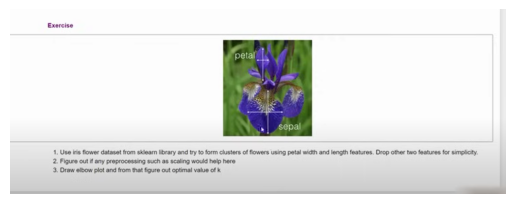

In [1]:
import matplotlib.pyplot as plt
import cv2
image = cv2.imread('exercise.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [16]:
df=pd.read_csv('iris(1).csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
df.shape

(150, 5)

***plot scatter plot***

Text(0, 0.5, 'petal_width')

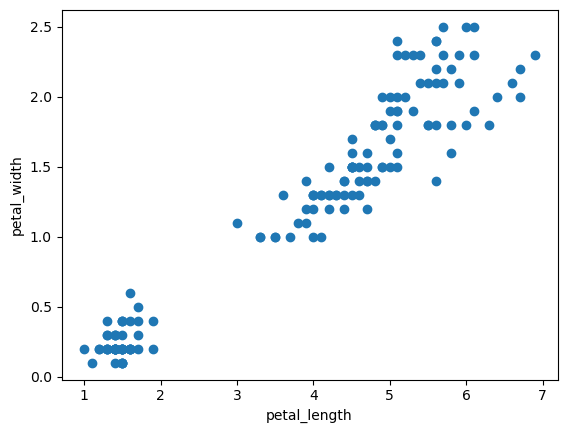

In [29]:
plt.scatter(df['petal_length'],df['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [35]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [37]:
y_predicted=km.fit_predict(df[['petal_length','petal_width']])
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
df['cluster']=y_predicted
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


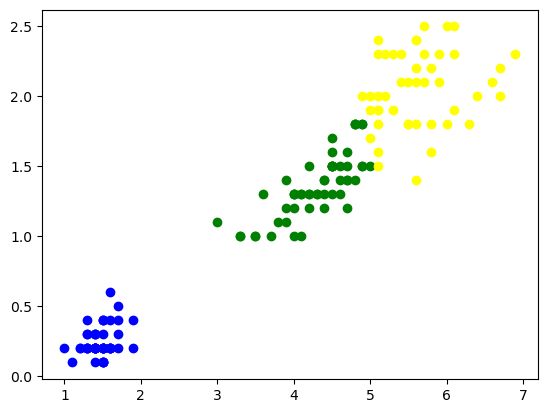

In [55]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['petal_length'],df1['petal_width'],color='green')
plt.scatter(df2['petal_length'],df2['petal_width'],color='blue')
plt.scatter(df3['petal_length'],df3['petal_width'],color='yellow')

- **there is problem in cluster 1 & 3**
- **so apply minmax scaler**

In [66]:
scaler=MinMaxScaler()
scaler.fit(df[['petal_length']])
df['petal_length']=scaler.transform(df[['petal_length']])

scaler.fit(df[['petal_width']])
df['petal_width']=scaler.transform(df[['petal_width']])

df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,0.067797,0.041667,setosa,1
1,4.9,3.0,0.067797,0.041667,setosa,1
2,4.7,3.2,0.050847,0.041667,setosa,1
3,4.6,3.1,0.084746,0.041667,setosa,1
4,5.0,3.6,0.067797,0.041667,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,0.711864,0.916667,virginica,2
146,6.3,2.5,0.677966,0.750000,virginica,2
147,6.5,3.0,0.711864,0.791667,virginica,2
148,6.2,3.4,0.745763,0.916667,virginica,2


**Now again we have to apply KMeans clusterin**

In [69]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [77]:
y_predicted=km.fit_predict(df[['petal_length','petal_width']])
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
df['cluster']=y_predicted
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,0.067797,0.041667,setosa,1
1,4.9,3.0,0.067797,0.041667,setosa,1
2,4.7,3.2,0.050847,0.041667,setosa,1
3,4.6,3.1,0.084746,0.041667,setosa,1
4,5.0,3.6,0.067797,0.041667,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,0.711864,0.916667,virginica,2
146,6.3,2.5,0.677966,0.750000,virginica,2
147,6.5,3.0,0.711864,0.791667,virginica,2
148,6.2,3.4,0.745763,0.916667,virginica,2


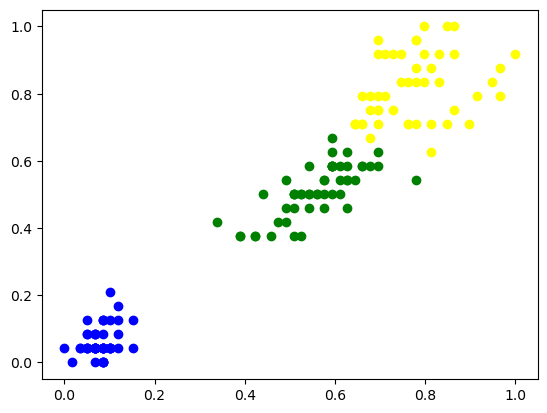

In [97]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['petal_length'],df1['petal_width'],color='green')
plt.scatter(df2['petal_length'],df2['petal_width'],color='blue')
plt.scatter(df3['petal_length'],df3['petal_width'],color='yellow')


***See the difference***

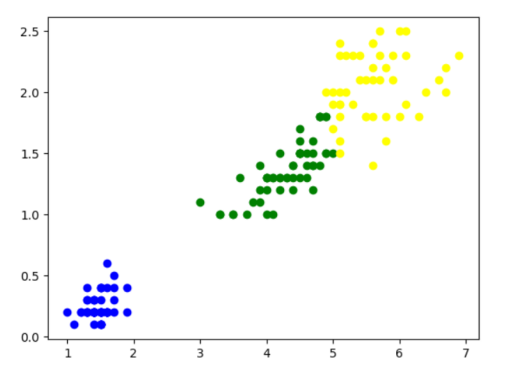

In [101]:
image = cv2.imread('plt1.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()

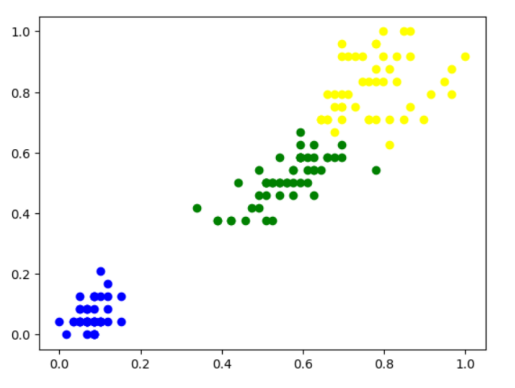

In [103]:
image=cv2.imread('plt2.png')
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

## **Draw the centroinds on scatter plot**

In [114]:
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07864407, 0.06      ],
       [0.7740113 , 0.81510417]])

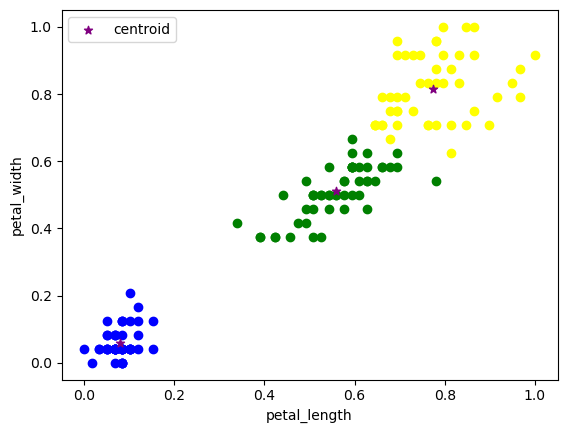

In [120]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['petal_length'],df1['petal_width'],color='green')
plt.scatter(df2['petal_length'],df2['petal_width'],color='blue')
plt.scatter(df3['petal_length'],df3['petal_width'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',label='centroid',marker='*')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

In [136]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal_length','petal_width']])
    sse.append(km.inertia_)              


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [138]:
sse

[28.391514358368717,
 5.179687509974784,
 1.7050986081225128,
 1.1647473293509738,
 0.8570856553216399,
 0.6919279777087511,
 0.6177115151216194,
 0.5187753766810835,
 0.4976581304442698]

Text(0, 0.5, 'petal_width')

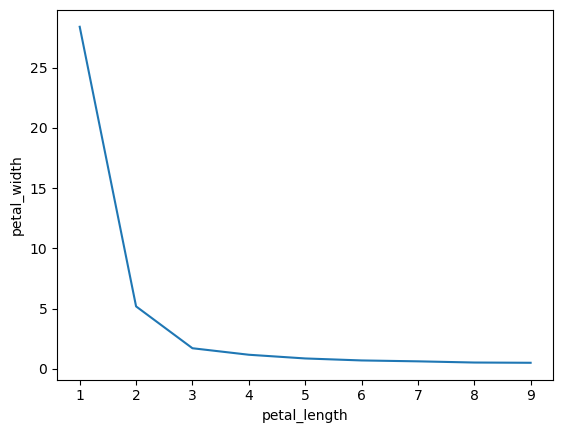

In [140]:
plt.plot(k_rng,sse)
plt.xlabel('petal_length')
plt.ylabel('petal_width')